In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bias = pd.read_csv('C:/Users/elean/Downloads/Risk_of_Bias.csv')

In [3]:
bias.head

<bound method NDFrame.head of             Study ID                                 Study Class  \
0       acarturk2016                               Psychotherapy   
1        acierno2017                               Psychotherapy   
2       adenauer2011                               Psychotherapy   
3         ahmadi2015                  Mixed: Psychotherapy & CIH   
4    ahmadizadeh2018                 Nonpharmacologic biological   
..               ...                                         ...   
384     zlotnick1997                               Psychotherapy   
385     zlotnick2009                               Psychotherapy   
386     zoellner2017      Mixed: Psychotherapy & pharmacotherapy   
387        zohar2002                             Pharmacotherapy   
388       zucker2009  Complementary and integrative health (CIH)   

    Treatment Focus  Total N Randomized (Study level)  \
0              PTSD                                98   
1              PTSD                    

In [5]:
bias.mean()

Total N Randomized (Study level)          82.966581
Attrition Overall Greater Than 20%         0.315994
Active Duty Military (Study level)         0.094748
Veteran Percent (Study level)              0.723692
Community Percent (Study level)            0.608769
Female Percent (Study level)               0.460399
Male Percent (Study level)                 0.539886
PTSDPubs ID                           100595.570248
Year Added to PTSD-Repository           2019.226221
dtype: float64

In [7]:
bias['Risk of Bias Rating']

0      Medium
1      Medium
2        High
3        High
4      Medium
        ...  
384      High
385      High
386    Medium
387    Medium
388      High
Name: Risk of Bias Rating, Length: 389, dtype: object

In [19]:
bias['Active Duty Military (Study level)'].unique()

array([   nan, 1.    , 0.    , 0.6   , 0.881 , 0.2982, 0.375 , 0.6857,
       0.9701, 0.0246, 0.1778])

In [ ]:
bias['Veteran Percent (Study level)'].unique()

In [6]:
def trauma_recode (series):
    if pd.isnull(series):
        return 0
    else:
        return 1
    

In [30]:
bias['Trauma Detail (Study level)']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
384                                                  NaN
385       rape/sexual assault, community/school violence
386    combat-related, child physical abuse, child se...
387         combat-related, accidents, other (captivity)
388                                                  NaN
Name: Trauma Detail (Study level), Length: 389, dtype: object

In [26]:
bias['Trauma Detail (Study level)'].value_counts(dropna=False)

NaN                                                                                                                                                                                             190
accidents, community/school violence                                                                                                                                                              4
combat-related, other (not specified)                                                                                                                                                             4
rape/sexual assault, community/school violence                                                                                                                                                    3
rape/sexual assault, accidents, community/school violence                                                                                                                                         3
                    

In [31]:
bias['trauma_recode'] = bias['Trauma Detail (Study level)'].apply(trauma_recode)

In [11]:
def male_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [65]:
bias['male_recode'] = bias['Male Percent (Study level)'].apply(male_recode)

In [50]:
def female_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [66]:
bias['female_recode'] = bias['Female Percent (Study level)'].apply(female_recode)

In [51]:
bias2 =bias[['Female Percent (Study level)', 'Male Percent (Study level)']].dropna()

In [52]:
def Military_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [70]:
def Veteran_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

In [72]:
bias['veteran_recode'] = bias['Veteran Percent (Study level)'].apply (veteran_recode)

NameError: name 'veteran_recode' is not defined

In [54]:
bias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 36 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Study ID                                                                               389 non-null    object 
 1   Study Class                                                                            389 non-null    object 
 2   Treatment Focus                                                                        389 non-null    object 
 3   Total N Randomized (Study level)                                                       389 non-null    int64  
 4   Selection Bias: Randomization Adequate                                                 389 non-null    object 
 5   Selection Bias: Allocation Concealment Adequate                               

In [18]:
bias.head()

,Study ID,Study Class,Treatment Focus,Total N Randomized (Study level),Selection Bias: Randomization Adequate,Selection Bias: Allocation Concealment Adequate,Selection Bias: Groups Similar at Baseline,Selection Bias: ITT Analysis,Performance Bias: Care Providers Masked,Performance Bias: Patients Masked,...,Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Female Percent Detail (Study level),Male Percent (Study level),Trauma Type (Study level),Trauma Detail (Study level),Citation,PTSDPubs ID,Year Added to PTSD-Repository
0,acarturk2016,Psychotherapy,PTSD,98,Yes,Yes,Unclear,Yes,No,No,...,NaN,1.0,0.7449,NaN,0.2551,Terrorism/political violence/forced displacement,NaN,"Acarturk C, Konuk E, Cetinkaya M, et al. The e...",45262.0,2019
1,acierno2017,Psychotherapy,PTSD,150,Yes,Yes,Yes,No,No,No,...,1.0,NaN,0.0379,NaN,0.9621,Combat-related,NaN,"Acierno RE, Knapp RG, Tuerk PW, et al. A non-i...",45948.0,2019
2,adenauer2011,Psychotherapy,PTSD,34,Yes,Unclear,No,Yes,No,No,...,NaN,1.0,0.4412,NaN,0.5588,Terrorism/political violence/forced displacement,NaN,"Adenauer H, Catani C, Gola H, et al. Narrative...",37889.0,2019
3,ahmadi2015,Mixed: Psychotherapy & CIH,PTSD,48,Unclear,Unclear,Yes,No,No,No,...,0.0,0.0,0.0000,NaN,1.0000,Combat-related,NaN,"Ahmadi K, Hazrati M, Ahmadizadeh MJ, et al. RE...",46896.0,2019
4,ahmadizadeh2018,Nonpharmacologic biological,PTSD,65,Unclear,Unclear,Yes,Yes,No,Yes,...,1.0,0.0,0.0000,NaN,1.0000,Combat-related,NaN,"Ahmadizadeh MJ, Rezaei M. Unilateral right and...",50480.0,2019


In [20]:
bias.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Total N Randomized (Study level),Attrition Overall Greater Than 20%,Active Duty Military (Study level),Veteran Percent (Study level),Community Percent (Study level),Female Percent (Study level),Male Percent (Study level),PTSDPubs ID,Year Added to PTSD-Repository
Total N Randomized (Study level),1.0,0.022,0.11,-0.063,-0.052,-0.049,0.049,-0.077,0.14
Attrition Overall Greater Than 20%,0.022,1.0,0.11,-0.11,-0.0018,-0.024,0.025,0.022,-0.03
Active Duty Military (Study level),0.11,0.11,1.0,-0.52,-0.16,-0.15,0.15,-0.051,-0.1
Veteran Percent (Study level),-0.063,-0.11,-0.52,1.0,-0.78,-0.53,0.53,-0.0003,-0.34
Community Percent (Study level),-0.052,-0.0018,-0.16,-0.78,1.0,0.74,-0.74,0.074,-0.16
Female Percent (Study level),-0.049,-0.024,-0.15,-0.53,0.74,1.0,-1.0,0.095,-0.058
Male Percent (Study level),0.049,0.025,0.15,0.53,-0.74,-1.0,1.0,-0.095,0.059
PTSDPubs ID,-0.077,0.022,-0.051,-0.0003,0.074,0.095,-0.095,1.0,0.027
Year Added to PTSD-Repository,0.14,-0.03,-0.1,-0.34,-0.16,-0.058,0.059,0.027,1.0


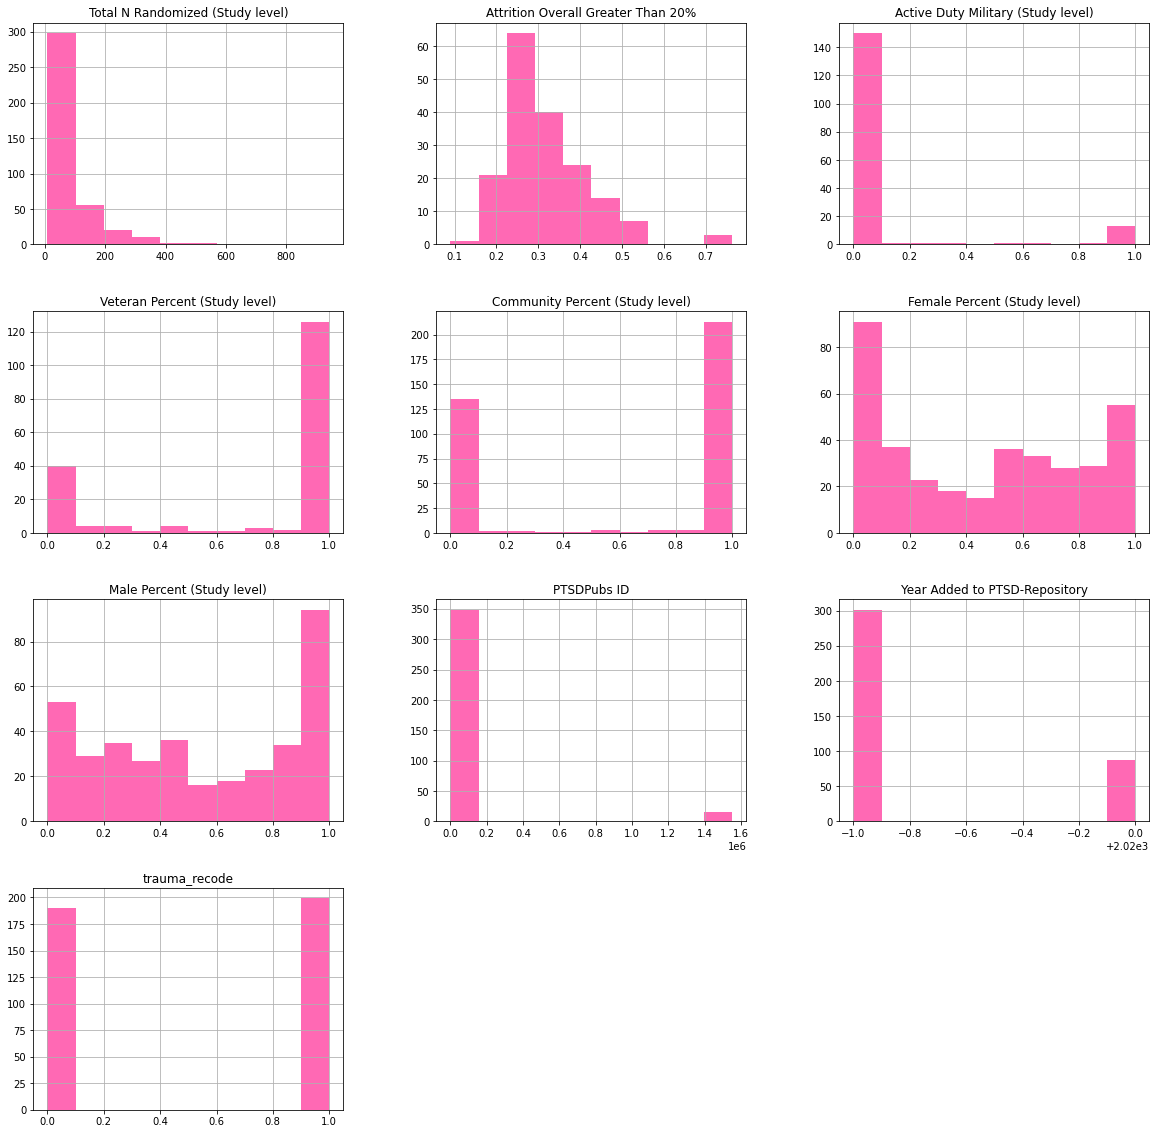

In [43]:
bias.hist(figsize= (20, 20), color = "hotpink")
plt.show()

In [40]:
bias_crosstab = pd.crosstab(bias['Female Percent (Study level)'], bias['Male Percent (Study level)'])
bias_crosstab

Male Percent (Study level),0.0000,0.0357,0.0590,0.0667,0.0789,0.0900,0.0926,0.1000,0.1111,0.1125,...,0.9630,0.9655,0.9661,0.9677,0.9726,0.9756,0.9762,0.9770,0.9810,1.0000
Female Percent (Study level),,,,,,,,,,,,,,,,,,,,,
0.0000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
0.0190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0.0230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
0.0238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0.0244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.9211,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.9333,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.9410,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
bias_crosstab = pd.crosstab(bias['Risk of Bias Rating'], bias['Male Percent (Study level)'])
bias_crosstab

Male Percent (Study level),0.0000,0.0357,0.0590,0.0667,0.0789,0.0900,0.0926,0.1000,0.1111,0.1125,...,0.9630,0.9655,0.9661,0.9677,0.9726,0.9756,0.9762,0.9770,0.9810,1.0000
Risk of Bias Rating,,,,,,,,,,,,,,,,,,,,,
High,17,0,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,20
Low,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,3
Medium,29,1,0,1,1,1,1,2,0,0,...,2,0,2,0,0,0,0,1,1,28


In [42]:
bias_crosstab = pd.crosstab(bias['Risk of Bias Rating'], bias['Female Percent (Study level)'])
bias_crosstab

Female Percent (Study level),0.0000,0.0190,0.0230,0.0238,0.0244,0.0274,0.0323,0.0339,0.0345,0.0370,...,0.8875,0.8889,0.9000,0.9074,0.9100,0.9211,0.9333,0.9410,0.9643,1.0000
Risk of Bias Rating,,,,,,,,,,,,,,,,,,,,,
High,20,0,0,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,17
Low,3,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Medium,28,1,1,0,0,0,0,2,0,2,...,0,0,2,1,1,1,1,0,1,29


(array([91., 37., 23., 18., 15., 36., 33., 28., 29., 55.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

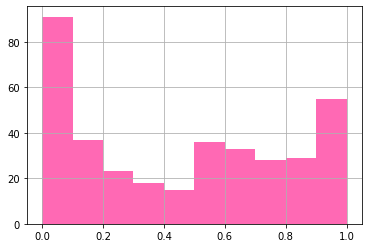

In [21]:
bias['Female Percent (Study level)'].hist()
plt.hist(bias['Female Percent (Study level)'], facecolor='hotpink')

(array([53., 29., 35., 27., 36., 16., 18., 23., 34., 94.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

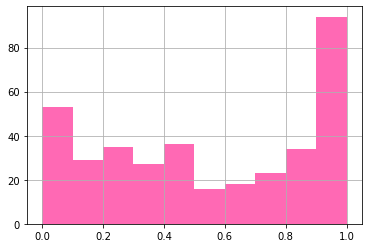

In [22]:
bias['Male Percent (Study level)'].hist()
plt.hist(bias['Male Percent (Study level)'], facecolor='hotpink')

(array([235.,   0.,   0.,   0.,   0., 132.,   0.,   0.,   0.,  22.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

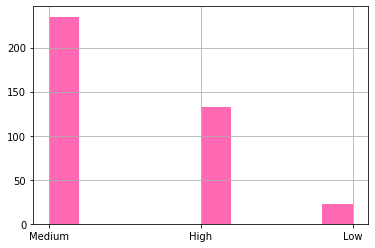

In [23]:
bias['Risk of Bias Rating'].hist()
plt.hist(bias['Risk of Bias Rating'], facecolor='hotpink')

(array([ 40.,   4.,   4.,   1.,   4.,   1.,   1.,   3.,   2., 126.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

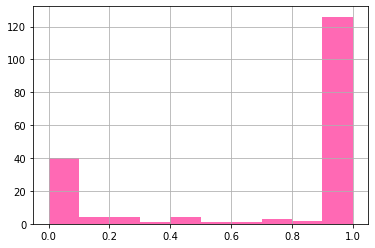

In [24]:
bias['Veteran Percent (Study level)'].hist()
plt.hist(bias['Veteran Percent (Study level)'], facecolor='hotpink')

(array([190.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 199.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

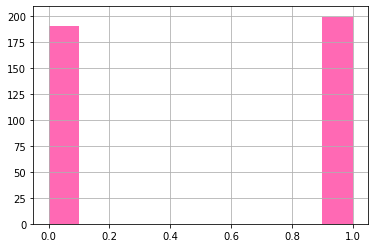

In [32]:
bias['trauma_recode'].hist()
plt.hist(bias['trauma_recode'], facecolor='hotpink')

(array([150.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,  13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

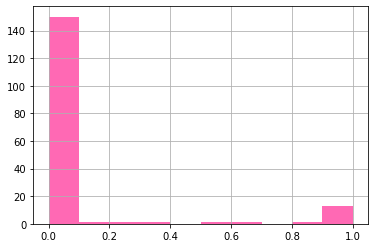

In [38]:
bias['Active Duty Military (Study level)'].hist()
plt.hist(bias['Active Duty Military (Study level)'], facecolor='hotpink')

(array([53., 29., 35., 27., 36., 16., 18., 23., 34., 94.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

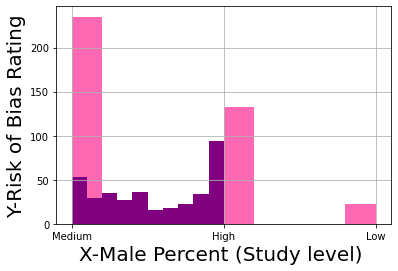

In [44]:
bias['Risk of Bias Rating'].hist()
p = sns.lineplot(dataSet = bias)
p.set_xlabel("X-Male Percent (Study level) ", fontsize = 20)
p.set_ylabel("Y-Risk of Bias Rating", fontsize = 20)
plt.hist(bias['Risk of Bias Rating'], facecolor='hotpink')
plt.hist(bias['Male Percent (Study level)'], facecolor='purple')

(array([53., 29., 35., 27., 36., 16., 18., 23., 34., 94.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

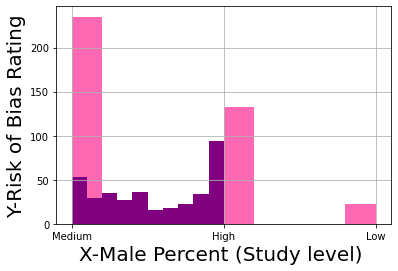

In [45]:
bias['Risk of Bias Rating'].hist()
p = sns.lineplot(dataSet = bias)
p.set_xlabel("X-Male Percent (Study level) ", fontsize = 20)
p.set_ylabel("Y-Risk of Bias Rating", fontsize = 20)
plt.hist(bias['Risk of Bias Rating'], facecolor='hotpink')
plt.hist(bias['Male Percent (Study level)'], facecolor='purple')

(array([150.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,  13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

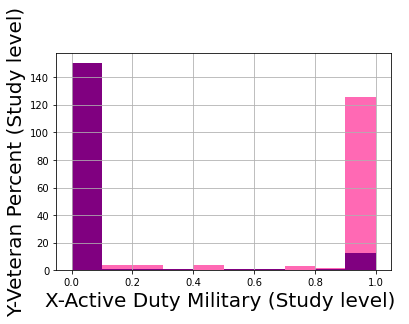

In [46]:
bias['Veteran Percent (Study level)'].hist()
p = sns.lineplot(dataSet = bias)
p.set_xlabel("X-Active Duty Military (Study level) ", fontsize = 20)
p.set_ylabel("Y-Veteran Percent (Study level)", fontsize = 20)
plt.hist(bias['Veteran Percent (Study level)'], facecolor='hotpink')
plt.hist(bias['Active Duty Military (Study level)'], facecolor='purple')

In [59]:
bias['Female Percent (Study level)'].unique()

array([0.7449, 0.0379, 0.4412, 0.    , 0.65  , 0.28  , 0.7857, 0.5294,
       0.6567, 0.875 , 0.091 , 0.193 , 0.8475, 0.871 , 0.0667, 0.1371,
          nan, 0.8182, 0.2143, 0.881 , 0.0556, 0.7347, 0.7   , 1.    ,
       0.0274, 0.8   , 0.733 , 0.457 , 0.79  , 0.507 , 0.5833, 0.52  ,
       0.9643, 0.5429, 0.23  , 0.4101, 0.6596, 0.9333, 0.0455, 0.6071,
       0.4365, 0.5625, 0.1017, 0.6744, 0.4603, 0.29  , 0.91  , 0.7308,
       0.7619, 0.7788, 0.541 , 0.66  , 0.0238, 0.0571, 0.0244, 0.162 ,
       0.34  , 0.0323, 0.825 , 0.806 , 0.24  , 0.4   , 0.3966, 0.5   ,
       0.5868, 0.098 , 0.309 , 0.1875, 0.1907, 0.556 , 0.4634, 0.7042,
       0.177 , 0.3455, 0.3944, 0.1202, 0.6515, 0.0339, 0.102 , 0.074 ,
       0.2282, 0.5714, 0.69  , 0.6522, 0.1207, 0.119 , 0.831 , 0.1915,
       0.9074, 0.0345, 0.1905, 0.139 , 0.2391, 0.1818, 0.1364, 0.36  ,
       0.5846, 0.2083, 0.6786, 0.2308, 0.823 , 0.9211, 0.11  , 0.6   ,
       0.8875, 0.3846, 0.5652, 0.62  , 0.2444, 0.2128, 0.1455, 0.0765,
      

In [60]:
bias['Risk of Bias Rating'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
def female_recode (series):
    if series < .25:
        return 0
    if series < .5:
        return 1
    if series < .75:
        return 2
    else:
        return 3

<AxesSubplot:xlabel='female_recode'>

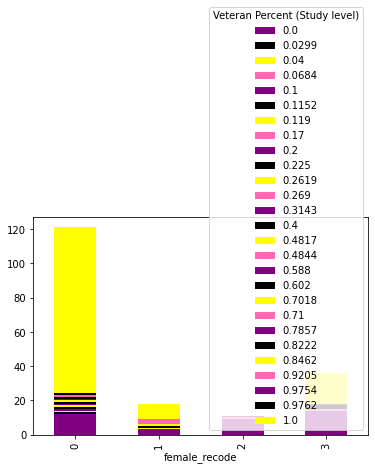

In [73]:
CrossTable = pd.crosstab(bias['female_recode'], bias['Veteran Percent (Study level)'])
CrossTable.plot.bar(stacked=True, color=['purple', 'black', 'yellow', 'hotpink'])